<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part One: Data Input </h2>	


<h3>  Import Statements </h3>	


In [1]:
#Import anything you need here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import skimage
from skimage import data
from skimage import io
import os
import re

In [3]:
train_path = './20_categories_training/'
val_path = './20_Validation/'
filemap = {0:"Airplanes", 1:"Bear", 2:"Blimp", 3:"Comet", 4:"Crab", 
           5:"Dog", 6:"Dolphin", 7:"Giraffe", 8:"Goat", 9:"Gorilla", 
           10:"Kangaroo", 11:"Killer-Whale", 12:"Leopards", 13:"Llama", 
           14:"Penguin", 15:"Porcupine", 16:"Teddy-Bear", 17:"Triceratops", 
           18:"Unicorn", 19:"Zebra"}
os.path.join(train_path, filemap[0])

'./20_categories_training/Airplanes'

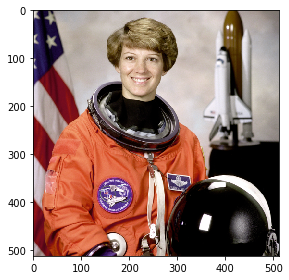

,Pictures,Encoding
0,"[[[154, 147, 151], [109, 103, 124], [63, 58, 1...",1
1,"[[116, 116, 122, 122, 116, 116, 117, 117, 119,...",2


In [15]:
#Example of reading in a file
# d.jpg, c.jpg not found for some reason

filename = os.path.join(skimage.data_dir, 'astronaut.png')
dog = io.imread(filename)
skimage.io.imshow(dog)

plt.show()
filename2 = os.path.join(skimage.data_dir, 'moon.png')
cat = io.imread(filename2)
example_data_frame= pd.DataFrame()

example_data_frame['Pictures']=[dog, cat]
example_data_frame['Encoding']=[1,2]
example_data_frame

<h4> Using the code for reference, take the given folder and create a dataframe with the picture object, and the encoding as listed below. </h4>	
0=Airplanes, 1=Bear, 2=Blimp, 3=Comet, 4=Crab, 5=Dog, 6=Dolphin, 7=Giraffe, 8=Goat, 9=Gorilla, 10=Kangaroo, 11=Killer-Whale, 12=Leopards, 13=Llama, 14= Penguin, 15= Porcupine, 16=Teddy-Bear, 17=Triceratops, 18=Unicorn, 19=Zebra

In [25]:
def read_train_data(file_path):
    # return training dataset with correct encoding labeled
    image_array = []
    encoding_array = []
    for encoding in range(20):
        current_folder = os.path.join(file_path, filemap[encoding])
        for file in os.listdir(current_folder):
            if file.startswith('.'):
                continue
            image_array.append(io.imread(os.path.join(current_folder, file)))
            encoding_array.append(encoding)
    res = pd.DataFrame()
    res['Pictures'] = image_array
    res['Encoding'] = encoding_array
    return res

def read_test_data(file_path):
    # read test dataset with correct orderings based on file name
    image_array = []
    image_name = []
    for file in os.listdir(file_path):
        if file.startswith('.'):
            continue
        image_name.append(re.findall(r'[0-9]+',file)[0])
        image_array.append(io.imread(os.path.join(file_path, file)))
    res = pd.DataFrame()
    res['Pictures'] = image_array
    res['Order'] = image_name
    return res.iloc[np.argsort(res.Order.apply(int)), [0]]



In [23]:
train_data = read_train_data(train_path)

In [26]:
test_data = read_test_data(val_path)

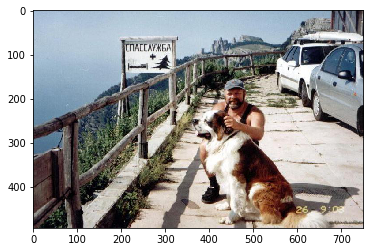

In [28]:
plt.imshow(test_data.iloc[600,0])